# TUTORIAL 2: advanced sources and records.
___________________________________________________________________________________

# Overview:
In this tutorial, we briefly discuss the various ways in which one can create source objects. In particular, we also show how to convert a record object into a source.

In [1]:
import __basik__ as bk

/home/dylan/Documents/Basik_Tutorial/__basik__/__init__.py:37: UserWarning: __basik__ has picked up that it is currently being run from within a Ipython or Jupyter Notebook. Display components requireQtA5gg to render. Most Ipython-based interactive notebooks havetheir kernel shut down when using QtA5gg as a Matplotlib backend. Hence, __basik__ will not use QtA5gg. As a result, please refrain from using __basik__ display components while in the Ipython or Jupyter Notebook environment. If display components are required, please use Ipython in a console. The Spyder IDE for Python is highly recommended.
  warnings.warn(message)


Importing matplotlib.pyplot as plt



## A custome rate_schedule
Our research makes use of Markov Modulated Poisson Processes (MMPPs) to simulate, describe and predict bursty arrival behaviour found in traffic. As such, we have created a custom schedule function dedicated to allowing the source object to produce arrivals from a MMPP. We will later show that this is not the only way to produce arrivals from an MMPP. It is the most convenient method though.

Setting up arrivals...
...done!
Simulation started...
...done!


/home/dylan/Documents/Basik_Tutorial/__basik__/global_queue.py:265: UserWarning: Simulation ended!self.Q is empty. No more events exist in this simulation.
  warnings.warn(message)
/home/dylan/Documents/Basik_Tutorial/__basik__/record.py:432: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


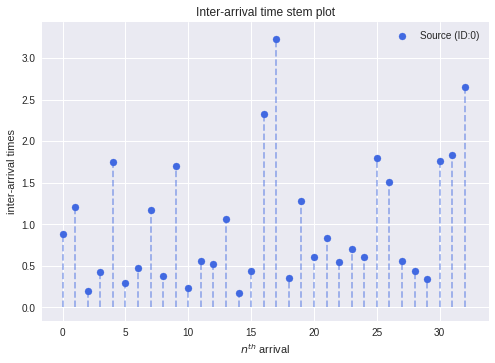

In [2]:
import numpy as np
%matplotlib inline  
plt.style.use('seaborn')  # Preferred style/aesthetics
np.random.seed(123)  # allows pseudo random number generator to re-produce results.
bk.Queue.clear()  # Safety
T = 40
road = bk.Lane(10)
# Generator Matrix of MMPP: basically a continuous-time Markov Chain
Q = np.array([[-0.1,0.05,0.05],
              [0.05,-0.1,0.05],
              [0.05,0.05,-0.1]])
# Poisson Process Rates fo each state in the MMPP
Rates = np.array([0.1,0.4,0.9])
MMPPschedule = bk.MMPP_rate_schedule(Q=Q,
                                     Rates=Rates,
                                     end_time=T,
                                     pi=None)  # will use stationary distribution

source = bk.Source(vehicle_velocity=16.67,
                   target_node=road.IN,
                   rate_schedule=MMPPschedule)
record = bk.Record(node=road.OUT)
print('Setting up arrivals...')
source.setup_arrivals(T)
print('...done!')
print('Simulation started...')
bk.Queue.run(40)
print('...done!')
record.stem_plot()


## Converting a record object into a source.
We will be converting the inter-arrival times from the record object into a new source object. This allows us to simulate from simulations. This is convenient as it allows us to simulate very large simulations in a piece-wise fashion. Furthermore, we recall that record objects can be saved in a `.pkl` file. These can be loaded using `bk.load_pickle` and then converted into a source. 

We will extend our current example by converting the current record object into a new source and then continuing the simulation with the new source. Tutorial 1 contains instructions on how to continue a simulation.

Setting up arrivals...
...done!
Simulation started...
...done!


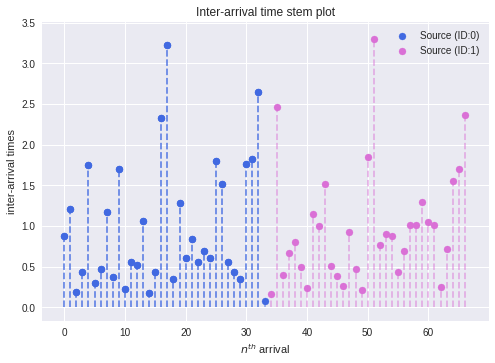

In [3]:
np.random.seed(123)
start_source = bk.Queue.latest_arrival_time
start_simulation = bk.Queue.current_time
# Below we perform the actual conversion!
new_source = record.to_source(target_node=road.IN,
                              vehicle_velocity=16.67)
print('Setting up arrivals...')
new_source.setup_arrivals(end_time=start_source+T,
                          start_time=start_source)
print('...done!')
print('Simulation started...')
bk.Queue.run(end_time=np.inf,  # run until the queue is empty
             start_time=start_simulation)
print('...done!')
record.stem_plot()
record.figure

Note how the second batch of arrivals is almost identical to the first. The similarity is due to the fact that the second batch was actually drawn from the first. The slight difference are due to the randomness or stochastic elements that vehicles experience when interacting with eachother and their environment.


## More ways to schedules for sources.
`__basik__` contains two functions that create source objects from either a csv file (containing time-stamps and NOT inervals) or a pickled record object. We present both these functions below. Recall that in Tutorial 1, we had already such files. We will be using them now.

In [4]:
import os
# CSV
csv_path = os.getcwd() + '/time_stamps.csv'
csv_source = bk.csv_to_source(file_name=csv_path,
                              vehicle_velocity=16.67,
                              target_node=road.IN)
# PICKLE
pickle_path = os.getcwd() + '/pickled_record.pkl'
pickle_source = bk.pickle_to_source(file_name=pickle_path,
                                    vehicle_velocity=16.67,
                                    target_node=road.IN)

One might wonder if we would encounter issues with the fact that time-stamps from the csv and pickle file do not match the time of the current simulation. In other words, the above sources might schedule arrivals that occur in the past i.e. time that the simulator has already passed. Fortunately, this is not the case. We have only created source objects above. We have not yet scheduled any arrivals from them. `__basik__` allows the user to specify a starting time for the scheduling of arrivals. This means that it will shift/translate the time-stamps such that the first time-stamp of the csv or pkl object match `start_time` as specified by the user. We first simulate using `csv_source`.

Setting up arrivals...
...done!
Simulation started...
...done!


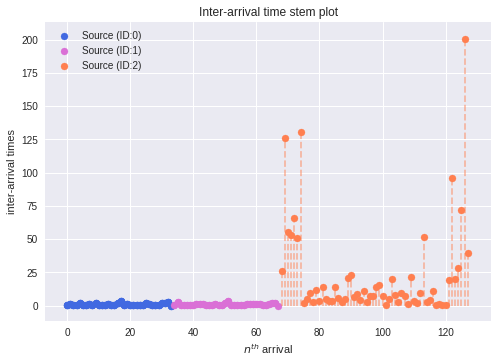

In [5]:
# CSV Source
np.random.seed(123)
# Get starting times
start_source = bk.Queue.latest_arrival_time
start_simulation = bk.Queue.current_time
# We would like to simulate from the entire file.
# This means that we would like to schedule arrivals until the end pf the file.
# We need the "duration" of the file
data = bk.load_csv(csv_path)['time-stamps']
duration = max(data) - min(data)
print('Setting up arrivals...')
csv_source.setup_arrivals(end_time=start_source+duration,
                          start_time=start_source)
print('...done!')
print('Simulation started...')
bk.Queue.run(end_time=np.inf,  # run until the queue is empty
             start_time=start_simulation)
print('...done!')
record.stem_plot()
record.figure

Setting up arrivals...
...done!
Simulation started...
...done!


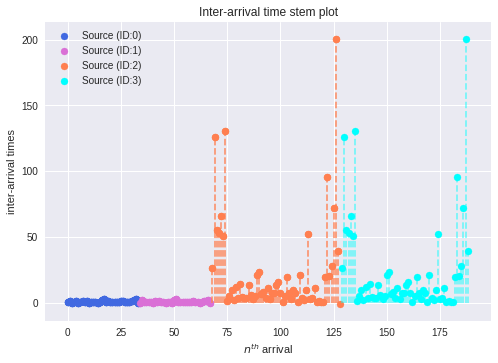

In [6]:
# CSV Source
np.random.seed(123)
# Get starting times
start_source = bk.Queue.latest_arrival_time
start_simulation = bk.Queue.current_time
# We would like to simulate from the entire file.
# This means that we would like to schedule arrivals until the end pf the file.
# We need the "duraration" of the fil
pkl_record = bk.load_pickle(pickle_path)
duration = max(pkl_record.time_stamps) - min(pkl_record.time_stamps)
print('Setting up arrivals...')
pickle_source.setup_arrivals(end_time=start_source+duration,
                             start_time=start_source)
print('...done!')
print('Simulation started...')
bk.Queue.run(end_time=np.inf,  # run until the queue is empty
             start_time=start_simulation)
print('...done!')
record.stem_plot()
record.figure


## Viewing the Exponential rate intensity function.
Thus far we have seen sources can either be created using a rate schedule or collected data. These two differ in the fact that the former will **simulate** arrivals from an Exponential process according to the rate intensity $\lambda(t)$. We note that $\lambda(t)$ is indeed non-stationary and depends on that rate_schedule given.

Recall the form of a rate_schedule:

In [7]:
from collections import OrderedDict # keeps keys ordered. Native Python dictionary uses 
# hashing of keys that do not preserve numerical order.
rate_schedule = OrderedDict({10:bk.Rate(0.1),
                             20:bk.Rate(0.3)})
rate_schedule

OrderedDict([(10, <__basik__.source.Rate at 0x7f79eb0fd110>),
             (20, <__basik__.source.Rate at 0x7f79ebfaf690>)])

Until now, we have eluded discussing the `bk.Rate` function. It is in fact $\lambda(t)$. In the example above `10:bk.Rate(0.1)` refers to $\lambda_1(t) = 0.1, \quad 0 \leq t < 10$ while `20:bk.Rate(0.3)` refers to $\lambda_2(t) = 0.3 \quad 10 \leq t < 20$.

The above example uses piecewise stationary Exponential rates. Hence, we could have dropped the dependence on time within each interval. We note, however, that the overall rate from 0 to 20 is dependent on time. We thus have:
$$\lambda(t) =  \begin{cases} \lambda_1, & 0 \leq t < 10\\
\lambda_2, & 10 \leq t < 20
\end{cases}
$$

One then wonders whether `bk.Rate` can allow for time-dependent rates. This would mean that a non-stationary rate function could be achieved without resorting to piece-wise constant setups. This has been considered in the design of the `bk.Rate` function. In fact, this function takes the form:

$$
\lambda(t) = c + (t-t_0)\mu + A\left(p \sin\left(\frac{t\pi}{T_1}\right) + (1-p)\cos\left(\frac{t\pi}{T_2}\right)\right)
$$
We refer to the documentation of the `bk.Rate` function (please note that all functions and classes have been documented according to the `Numpy` style documentation used by most scientific computing libraries in Python.)

In [8]:
help(bk.Rate)

Help on class Rate in module __basik__.source:

class Rate(builtins.object)
 |  Rate(constant: float, drift=None, drift_reference=None, amplitude=None, prob=None, T1=None, T2=None)
 |  
 |  Produces a callable object from the give parameters.
 |  
 |  The intention of this callable object is to produce some custom rate 
 |  intensity that a source object can use to simulate arrivals from.
 |  Note that we are modelling the rate intensity of an Exponential process.
 |  An example of a rate schedule using Rate objects could be as follows:
 |  >>> schedule = {10:Rate(constant=1),20:Rate(constant=1,drift=0.1)}
 |  A preferred version would actually be as follows:
 |  >>> schedule = collections.OrderedDict(
 |  ...                                    {10:Rate(constant=1),
 |  ...                                     20:Rate(constant=1,drift=0.1)}
 |  ...                                    )
 |  
 |  Notes:
 |  -------
 |  The rate intensity function of the Exponential process is modelled as f

The documentation contains two formulas for the rate function. The one function is as we present in terms of symbols and the other is in terms of code arguments. This is intended to relate the code argument to the symbol. Furthermore, each argument has a brief explantion of its role in the overall equation.

We now show by means of an example how to create a highly custom rate schedule and how to view the resulting intesnity function.

In [9]:
advanced_rate_schedule = OrderedDict({10:bk.Rate(constant=0.1,
                                                 drift=0.001,
                                                drift_reference=0),
                                     30:bk.Rate(constant=0.2,
                                                drift=-0.001,
                                                drift_reference=10,
                                                amplitude=0.005,
                                                prob=0.8,
                                                T1=5,
                                                T2=1),
                                     50:bk.Rate(0.2),
                                     60:bk.Rate(constant=0.2,
                                                drift=0.001,
                                                drift_reference=50),
                                     100:bk.Rate(constant=0.22,
                                                drift=-0.002,
                                                drift_reference=60,
                                                amplitude=0.01,
                                                prob=0.8,
                                                T1=5,
                                                T2=2),})

We can not put into a source object. This will allows us to use the `view_rate` method.

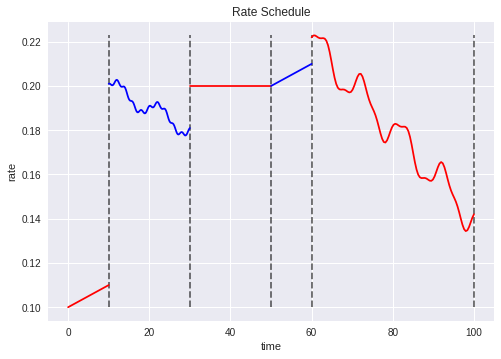

In [10]:
advanced_source = bk.Source(vehicle_velocity=16.67,
                            target_node=road.IN,
                            rate_schedule=advanced_rate_schedule)
advanced_source.view_rate()

The same can be done if a custom `bk.MMPP_rate_schedule` was used. **NOTE:** the rate schedule cannot be viewed if a `csv` or `pkl` file or record object was given. This is is because the scheduled arrivals are already present and we will not simulate arrivals from some intensity function. In fact, finding the underlying intensity function from these arrivals is a Signal Processing/Machine learning task and requires dedicated resources of its own not found in the `__basik__` package.

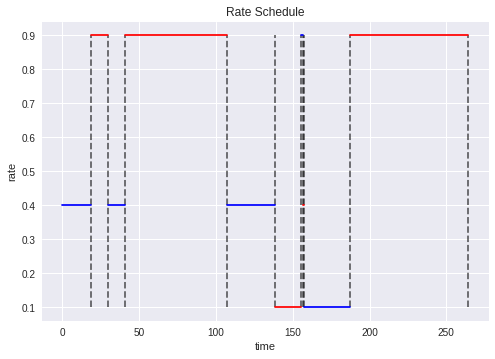

In [11]:
np.random.seed(0)  # if one wants to replicate MMPPschedule
Q = np.array([[-0.1,0.05,0.05],
              [0.05,-0.1,0.05],
              [0.05,0.05,-0.1]])
# Poisson Process Rates fo each state in the MMPP
Rates = np.array([0.1,0.4,0.9])
MMPPschedule = bk.MMPP_rate_schedule(Q=Q,
                                     Rates=Rates,
                                     end_time=200,
                                     pi=None) 
MMPP_source = bk.Source(vehicle_velocity=16.67,
                        target_node=road.IN,
                        rate_schedule=MMPPschedule)
MMPP_source.view_rate()

## A fully custom source
One might have realised that the greatest flexibility lies in the `csv` file method of producing arrivals. Essentially, anything that can produce a `csv` file can be simulated from. If one were to use another simulator to produce time-stamps in the form of a `csv` then this could be used in the source object (give that it has time-stamps as its header). One could even put a real-life data-set into the source object. 

What this also means, is that we can simulate time-stamps from any generative model, place it into a `csv` file and set up a source object that generates arrivals from it. We illustrate this idea below where we write a custom function that produces time-stamps according to a Hidden Markov Model where emissions/observations ($t_i$) are inter-arrival times that follow an Exponential Process that has its rate intenstiy $\lambda_i$ dependent on a latent state $z_i$ that follows an AR(1) process. Thats is:

$$ t_i \sim \mbox{Exp}(\lambda_i) $$
$$ \lambda_i = \bar{\lambda}e^{z_i}$$
$$ z_i = \phi z_{i-1} + \sigma \eta_i $$
$$\eta_i \sim N(0,1) $$
It is required that $\mid \phi \mid < 1$.


In [15]:
def sim_AR1_HMM(start_time,
                end_time,
                z0,
                lam_bar,
                phi,
                sigma,
                min_lam=1e-3):
    if abs(phi) >= 1:
        raise ValueError('abs(phi) < 1')
    assert end_time > start_time
    t = start_time
    z = z0
    time_stamps = []
    lambdas = []
    while True:
        eta = np.random.normal(0,1)
        z = z*phi + sigma*eta
        lam_i = lam_bar*np.exp(z)
        interval = np.random.exponential(scale=1./lam_i)
        t_temp = t + interval
        if t_temp > end_time:
            break
        t = t_temp
        time_stamps.append(t)
        lambdas.append(lam_i)
    return time_stamps,lambdas

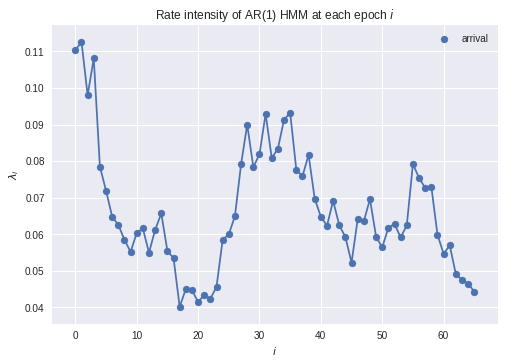

In [30]:
np.random.seed(123)
time_stamps,lambdas = sim_AR1_HMM(start_time=0,
                                  end_time=1000,
                                  z0=1,
                                  lam_bar=0.05,
                                  phi=0.9,
                                  sigma=0.1)
plt.plot(lambdas)
plt.scatter(range(len(lambdas)),lambdas,label='arrival')
plt.xlabel('$i$')
plt.ylabel('$\lambda_i$')
plt.title('Rate intensity of AR(1) HMM at each epoch $i$')
plt.legend(loc='best')
plt.show()

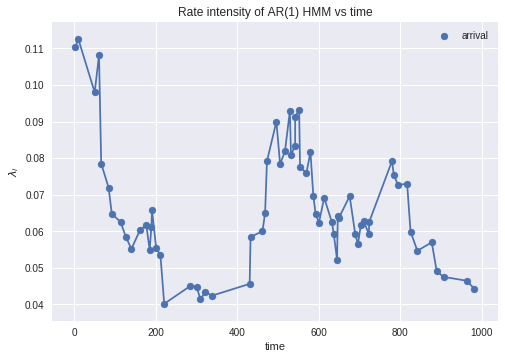

In [17]:
plt.plot(time_stamps,lambdas)
plt.scatter(time_stamps,lambdas,label='arrival')
plt.xlabel('time')
plt.ylabel('$\lambda_i$')
plt.title('Rate intensity of AR(1) HMM vs time')
plt.legend(loc='best')
plt.show()

It is an interesting model to simulate from. The AR(1) HMM is often used in studies where an unstructured bursty nature is observed. It thus serves as a suitable model to produce traffic arrivals from as traffic is often bursty/self-similar. We now show how to produce a source object from our simulated data.

In [18]:
import pandas as pd # a very convenient library to handle data with.
data_to_save = pd.DataFrame(data=time_stamps,
                           columns=['time-stamps'])  # VERY IMPORTANT label
data_to_save

,time-stamps
0,2.331987
1,9.448028
2,49.763344
3,60.446953
4,65.801699
...,...
61,877.415054
62,889.638896
63,906.346830
64,962.876686


In [19]:
path_name = os.getcwd() + '/AR1_HMM.csv'
data_to_save.to_csv(path_name)
AR1_HMM_source = bk.csv_to_source(file_name=path_name,
                                  vehicle_velocity=16.67,
                                  target_node=road.IN)

Let us perform an actual simulation from this source.

Setting up arrivals...
...done!
Simulation started...
...done!


/home/dylan/Documents/Basik_Tutorial/__basik__/global_queue.py:265: UserWarning: Simulation ended!self.Q is empty. No more events exist in this simulation.
  warnings.warn(message)
/home/dylan/Documents/Basik_Tutorial/__basik__/record.py:432: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


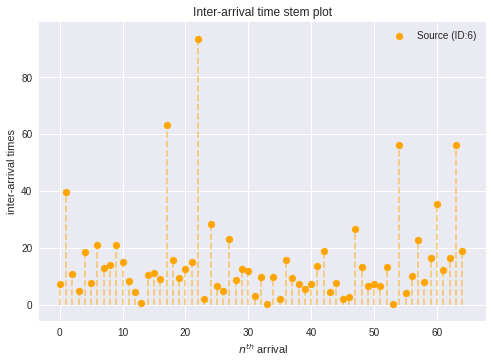

In [20]:
bk.Queue.clear()
new_record = bk.Record(node=road.OUT)
print('Setting up arrivals...')
AR1_HMM_source.setup_arrivals(end_time=1000,
                              start_time=0)
print('...done!')
print('Simulation started...')
bk.Queue.run(end_time=np.inf,  # run until the queue is empty
             start_time=start_simulation)
print('...done!')
new_record.stem_plot()


# Conclusion/Summary
We have seen how record objects can be saved, converted into source objects, how source objects can be created in a variety of ways, how to model complex rate schedules for sources and how to achieve maximum flexibility in producing arrivals via the use to simulated `csv` files.

We are now read to move onto more complex components other than the road object. We will also introduce the display component of our simulator. 